# Sequential API vs Functional API model in Keras



In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist  

In [2]:
tensorflow.keras.__version__

'2.3.0-tf'

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [4]:
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Creating Sequential API model:

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6156 - accuracy: 0.8417 - val_loss: 0.3096 - val_accuracy: 0.9122
Epoch 2/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2932 - accuracy: 0.9161 - val_loss: 0.2425 - val_accuracy: 0.9336
Epoch 3/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2426 - accuracy: 0.9306 - val_loss: 0.2115 - val_accuracy: 0.9448
Epoch 4/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2081 - accuracy: 0.9411 - val_loss: 0.1840 - val_accuracy: 0.9486
Epoch 5/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1817 - accuracy: 0.9487 - val_loss: 0.1625 - val_accuracy: 0.9582
Epoch 6/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1613 - accuracy: 0.9542 - val_loss: 0.1552 - val_accuracy: 0.9596
Epoch 7/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.1445 - accuracy: 0.9590 - val_loss: 0.1363 - 

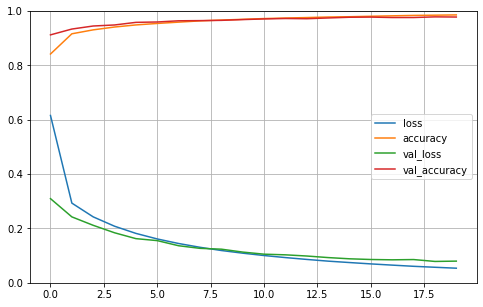

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Creating Functional API model:

In [14]:
input_ = keras.layers.Input(shape=[28, 28])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_ = keras.layers.Concatenate()([input_, reshap])
flatten2 = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output] )

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16384)        12861440    flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          8389120     dense_3[0][0]                    
______________________________________________________________________________________________

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
h = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 606s 352ms/step - loss: 0.5756 - accuracy: 0.8591 - val_loss: 0.2919 - val_accuracy: 0.9200
Epoch 2/10
 475/1719 [=======>......................] - ETA: 7:09 - loss: 0.2851 - accuracy: 0.9180

KeyboardInterrupt: 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [16]:
input_A = keras.layers.Input(shape=[28, 28])
input_B = keras.layers.Input(shape=[28, 28])

flatten = keras.layers.Flatten(input_shape=[28, 28])(input_A)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_A = keras.layers.Concatenate()([input_A, reshap])
flatten_A = keras.layers.Flatten(input_shape=[28, 28])(concat_A)
output = keras.layers.Dense(10, activation='softmax')(flatten_A)


concat_B = keras.layers.Concatenate()([input_B, reshap])
flatten_B = keras.layers.Flatten(input_shape=[28, 28])(concat_B)

hidden_B = keras.layers.Dense(512, activation='relu')(flatten_B)
output_2nd = keras.layers.Dense(10, activation='softmax')(hidden_B)

In [17]:
X_train_A, X_train_B = X_train[:-27500], X_train[-27500:]
y_train_A, y_train_B = y_train[:-27500], y_train[-27500:]

In [18]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_2nd])

In [19]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"],
                     optimizer="sgd", metrics=["accuracy"])

h = model.fit([X_train_A, X_train_B], [y_train_A, y_train_B], epochs=10, validation_split= 0.2 )


Epoch 1/10
688/688 [==============================] - 315s 458ms/step - loss: 1.8308 - dense_6_loss: 0.9036 - dense_8_loss: 0.9271 - dense_6_accuracy: 0.7957 - dense_8_accuracy: 0.7910 - val_loss: 0.9815 - val_dense_6_loss: 0.5296 - val_dense_8_loss: 0.4519 - val_dense_6_accuracy: 0.8633 - val_dense_8_accuracy: 0.8916
Epoch 2/10
688/688 [==============================] - 299s 435ms/step - loss: 0.8505 - dense_6_loss: 0.3957 - dense_8_loss: 0.4548 - dense_6_accuracy: 0.8970 - dense_8_accuracy: 0.8775 - val_loss: 0.7333 - val_dense_6_loss: 0.3903 - val_dense_8_loss: 0.3430 - val_dense_6_accuracy: 0.8860 - val_dense_8_accuracy: 0.9102
Epoch 3/10
688/688 [==============================] - 307s 446ms/step - loss: 0.6937 - dense_6_loss: 0.3109 - dense_8_loss: 0.3828 - dense_6_accuracy: 0.9153 - dense_8_accuracy: 0.8927 - val_loss: 0.6408 - val_dense_6_loss: 0.3316 - val_dense_8_loss: 0.3092 - val_dense_6_accuracy: 0.9005 - val_dense_8_accuracy: 0.9193
Epoch 4/10
688/688 [====================